# Librerías

In [1]:
# Logistic regression for breast cancer

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Importar datos

In [2]:
# Carga el conjunto de datos Breast Cancer
dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names) # 569x30 (DataFrame)
# X = dataset.data # 569x30 (NumPy object array)
y = dataset.target # 569x1

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza los datos para que todas las características tengan una escala similar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # calcula los parámetros: media y desv. estandar
X_test = scaler.transform(X_test) # usa los parámetros (media y desv. estandar) ya calculados en el training set.


# Modelado

In [3]:
# Crea y entrena el modelo de regresión logistica
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=100)
model.fit(X_train, y_train)

# Imprime los coeficientes y el intercepto del modelo entrenado
print("\nCoeficientes del modelo:")
print(model.coef_)
print("\nIntercepto del modelo:")
print(model.intercept_)


Coeficientes del modelo:
[[-0.42789615 -0.39391343 -0.38955025 -0.46431618 -0.06675416  0.54210625
  -0.79677127 -1.1170207   0.23571257  0.07670117 -1.27114722  0.18863977
  -0.60936581 -0.90979979 -0.31246106  0.68597229  0.18081531 -0.31769168
   0.49997976  0.61340541 -0.87861043 -1.3421883  -0.58755707 -0.84655924
  -0.54994459  0.00520705 -0.94571375 -0.77343621 -1.20853126 -0.1541604 ]]

Intercepto del modelo:
[0.44359695]


# Evaluación

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

confusion matrix: 
 [[41  2]
 [ 1 70]]


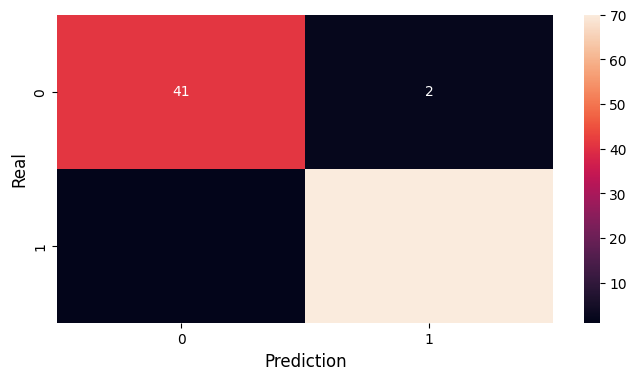

accuracy:  0.9736842105263158
recall:  0.9859154929577465
precision:  0.9722222222222222
specificity:  0.9534883720930233
f1 score:  0.979020979020979
auc:  0.969701932525385


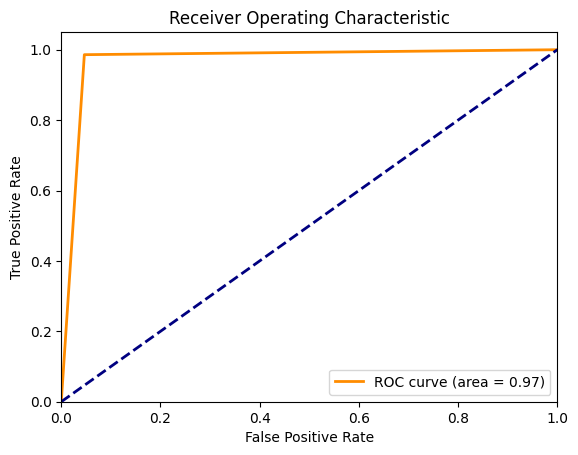

R2:  0.8879790370127744


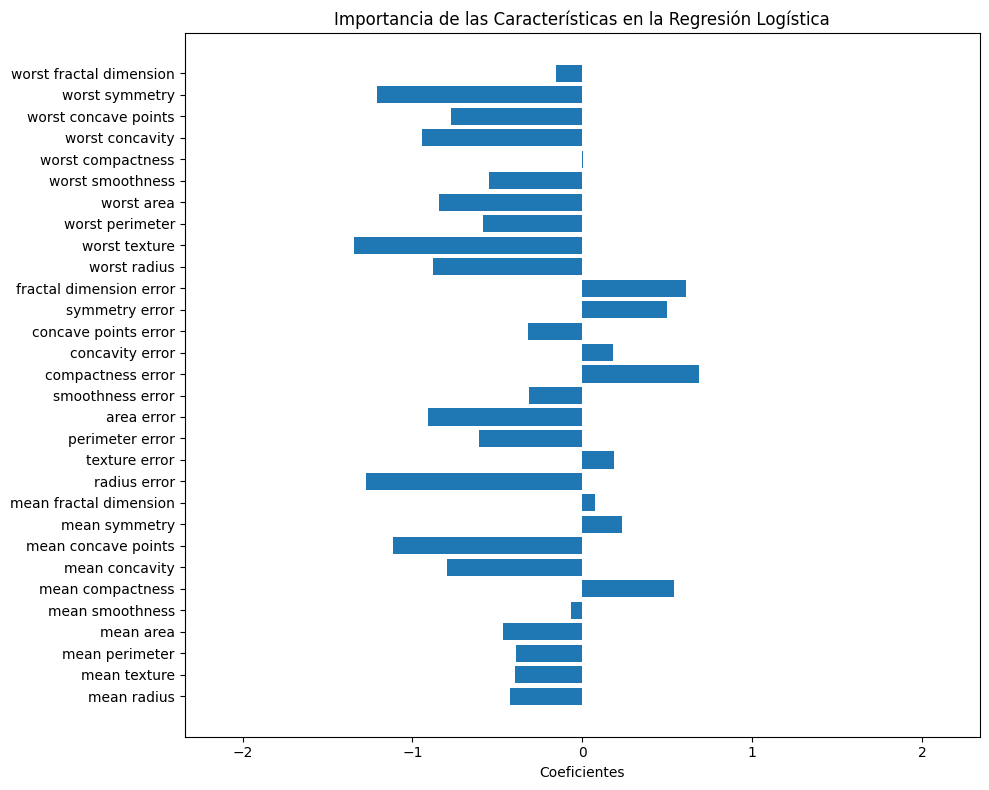

In [4]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad (recall):
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

# Visualizar la importancia de las características
feature_names = dataset.feature_names
coefficients = model.coef_
# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

# Crear un gráfico de barras horizontal
ax.barh(feature_names, coefficients[0])
ax.set_title('Importancia de las Características en la Regresión Logística')
ax.set_xlabel('Coeficientes')
ax.set_xlim(-max(abs(coefficients[0]))-1, max(abs(coefficients[0]))+1)

plt.tight_layout()
plt.show()


# Guardar el modelo

In [5]:
# Guardar el modelo a un archivo
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('logistic_regression_model.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)